# 2 Data wrangling<a id='2_Data_wrangling'></a>

## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Data wrangling](#2_Data_wrangling)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
    * [2.2.1 Recap Of Data Science Problem](#2.2.1_Recap_Of_Data_Science_Problem)
    * [2.2.2 Introduction To Notebook](#2.2.2_Introduction_To_Notebook)
  * [2.3 Imports](#2.3_Imports)
  * [2.4 Objectives](#2.4_Objectives)
  * [2.5 Load The Ski Resort Data](#2.5_Load_The_Ski_Resort_Data)
  * [2.6 Explore The Data](#2.6_Explore_The_Data)
    * [2.6.1 Find Your Resort Of Interest](#2.6.1_Find_Your_Resort_Of_Interest)
    * [2.6.2 Number Of Missing Values By Column](#2.6.2_Number_Of_Missing_Values_By_Column)
    * [2.6.3 Categorical Features](#2.6.3_Categorical_Features)
      * [2.6.3.1 Unique Resort Names](#2.6.3.1_Unique_Resort_Names)
      * [2.6.3.2 Region And State](#2.6.3.2_Region_And_State)
      * [2.6.3.3 Number of distinct regions and states](#2.6.3.3_Number_of_distinct_regions_and_states)
      * [2.6.3.4 Distribution Of Resorts By Region And State](#2.6.3.4_Distribution_Of_Resorts_By_Region_And_State)
      * [2.6.3.5 Distribution Of Ticket Price By State](#2.6.3.5_Distribution_Of_Ticket_Price_By_State)
        * [2.6.3.5.1 Average weekend and weekday price by state](#2.6.3.5.1_Average_weekend_and_weekday_price_by_state)
        * [2.6.3.5.2 Distribution of weekday and weekend price by state](#2.6.3.5.2_Distribution_of_weekday_and_weekend_price_by_state)
    * [2.6.4 Numeric Features](#2.6.4_Numeric_Features)
      * [2.6.4.1 Numeric data summary](#2.6.4.1_Numeric_data_summary)
      * [2.6.4.2 Distributions Of Feature Values](#2.6.4.2_Distributions_Of_Feature_Values)
        * [2.6.4.2.1 SkiableTerrain_ac](#2.6.4.2.1_SkiableTerrain_ac)
        * [2.6.4.2.2 Snow Making_ac](#2.6.4.2.2_Snow_Making_ac)
        * [2.6.4.2.3 fastEight](#2.6.4.2.3_fastEight)
        * [2.6.4.2.4 fastSixes and Trams](#2.6.4.2.4_fastSixes_and_Trams)
  * [2.7 Derive State-wide Summary Statistics For Our Market Segment](#2.7_Derive_State-wide_Summary_Statistics_For_Our_Market_Segment)
  * [2.8 Drop Rows With No Price Data](#2.8_Drop_Rows_With_No_Price_Data)
  * [2.9 Review distributions](#2.9_Review_distributions)
  * [2.10 Population data](#2.10_Population_data)
  * [2.11 Target Feature](#2.11_Target_Feature)
    * [2.11.1 Number Of Missing Values By Row - Resort](#2.11.1_Number_Of_Missing_Values_By_Row_-_Resort)
  * [2.12 Save data](#2.12_Save_data)
  * [2.13 Summary](#2.13_Summary)


## 2.2 Introduction<a id='2.2_Introduction'></a>

This step focuses on collecting your data, organizing it, and making sure it's well defined. Paying attention to these tasks will pay off greatly later on. Some data cleaning can be done at this stage, but it's important not to be overzealous in your cleaning before you've explored the data to better understand it.

### 2.2.1 Recap Of Data Science Problem<a id='2.2.1_Recap_Of_Data_Science_Problem'></a>

The purpose of this data science project is to come up with a pricing model for ski resort tickets in our market segment. Big Mountain suspects it may not be maximizing its returns, relative to its position in the market. It also does not have a strong sense of what facilities matter most to visitors, particularly which ones they're most likely to pay more for. This project aims to build a predictive model for ticket price based on a number of facilities, or properties, boasted by resorts (*at the resorts).* 
This model will be used to provide guidance for Big Mountain's pricing and future facility investment plans.

### 2.2.2 Introduction To Notebook<a id='2.2.2_Introduction_To_Notebook'></a>

Notebooks grow organically as we explore our data. If you used paper notebooks, you could discover a mistake and cross out or revise some earlier work. Later work may give you a reason to revisit earlier work and explore it further. The great thing about Jupyter notebooks is that you can edit, add, and move cells around without needing to cross out figures or scrawl in the margin. However, this means you can lose track of your changes easily. If you worked in a regulated environment, the company may have a a policy of always dating entries and clearly crossing out any mistakes, with your initials and the date.

**Best practice here is to commit your changes using a version control system such as Git.** Try to get into the habit of adding and committing your files to the Git repository you're working in after you save them. You're are working in a Git repository, right? If you make a significant change, save the notebook and commit it to Git. In fact, if you're about to make a significant change, it's a good idea to commit before as well. Then if the change is a mess, you've got the previous version to go back to.

**Another best practice with notebooks is to try to keep them organized with helpful headings and comments.** Not only can a good structure, but associated headings help you keep track of what you've done and your current focus. Anyone reading your notebook will have a much easier time following the flow of work. Remember, that 'anyone' will most likely be you. Be kind to future you!

In this notebook, note how we try to use well structured, helpful headings that frequently are self-explanatory, and we make a brief note after any results to highlight key takeaways. This is an immense help to anyone reading your notebook and it will greatly help you when you come to summarise your findings. **Top tip: jot down key findings in a final summary at the end of the notebook as they arise. You can tidy this up later.** This is a great way to ensure important results don't get lost in the middle of your notebooks.

In this, and subsequent notebooks, there are coding tasks marked with `#Code task n#` with code to complete. The `___` will guide you to where you need to insert code.

## 2.3 Imports<a id='2.3_Imports'></a>

Placing your imports all together at the start of your notebook means you only need to consult one place to check your notebook's dependencies. By all means import something 'in situ' later on when you're experimenting, but if the imported dependency ends up being kept, you should subsequently move the import statement here with the rest.

In [796]:
#Code task 1#
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import seaborn as sns
import os

# Load the pyplot collection of functions from matplotlib, as plt
from matplotlib import pyplot as plt


import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.5f' % x)
# comments: <span style="color:#20B2AA">

from library.sb_utils import save_file


## 2.4 Objectives<a id='2.4_Objectives'></a>

There are some fundamental questions to resolve in this notebook before you move on.

* Do you think you may have the data you need to tackle the desired question?
    * Have you identified the required target value?
    * Do you have potentially useful features?
* Do you have any fundamental issues with the data?

## 2.5 Load The Ski Resort Data<a id='2.5_Load_The_Ski_Resort_Data'></a>

In [797]:
# the supplied CSV data file is the raw_data directory
ski_data = pd.read_csv('../raw_data/ski_resort_data.csv')

Good first steps in auditing the data are the info method and displaying the first few records with head.

In [798]:
#Code task 2#
#Call the info method on ski_data to see a summary of the data
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   Region             330 non-null    object 
 2   state              330 non-null    object 
 3   summit_elev        330 non-null    int64  
 4   vertical_drop      330 non-null    int64  
 5   base_elev          330 non-null    int64  
 6   trams              330 non-null    int64  
 7   fastEight          164 non-null    float64
 8   fastSixes          330 non-null    int64  
 9   fastQuads          330 non-null    int64  
 10  quad               330 non-null    int64  
 11  triple             330 non-null    int64  
 12  double             330 non-null    int64  
 13  surface            330 non-null    int64  
 14  total_chairs       330 non-null    int64  
 15  Runs               326 non-null    float64
 16  TerrainParks       279 non

`AdultWeekday` is the price of an adult weekday ticket. `AdultWeekend` is the price of an adult weekend ticket. The other columns are potential features.

This immediately raises the question of what quantity will you want to model? You know you want to model the ticket price, but you realise there are two kinds of ticket price!

In [799]:
#Code task 3#
#Call the head method on ski_data to print the first several rows of the data
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.00000,0,2,...,1.00000,1610.00000,113.00000,150.00000,60.00000,669.00000,65.00000,85.00000,150.00000,550.00000
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.00000,0,0,...,2.00000,640.00000,60.00000,45.00000,44.00000,350.00000,47.00000,53.00000,90.00000,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.00000,0,0,...,1.00000,30.00000,30.00000,150.00000,36.00000,69.00000,30.00000,34.00000,152.00000,30.00000
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.00000,1,0,...,2.00000,777.00000,104.00000,122.00000,81.00000,260.00000,89.00000,89.00000,122.00000,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,...,1.20000,800.00000,80.00000,115.00000,49.00000,250.00000,74.00000,78.00000,104.00000,80.00000


In [800]:
print(ski_data.shape)

(330, 27)


In [801]:
original_columns_set = set(ski_data.columns)

The output above suggests you've made a good start getting the ski resort data organized. You have plausible column headings. You can already see you have a missing value in the `fastEight` column

## 2.6 Explore The Data<a id='2.6_Explore_The_Data'></a>

### 2.6.1 Find Your Resort Of Interest<a id='2.6.1_Find_Your_Resort_Of_Interest'></a>

Your resort of interest is called Big Mountain Resort. Check it's in the data:

In [802]:
#Code task 4#
#Filter the ski_data dataframe to display just the row for our resort with the name 'Big Mountain Resort'
#Hint: you will find that the transpose of the row will give a nicer output. DataFrame's do have a
#transpose method, but you can access this conveniently with the `T` property.
ski_data[ski_data.Name == 'Big Mountain Resort'].head()


,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
151,Big Mountain Resort,Montana,Montana,6817,2353,4464,0,0.00000,0,3,...,3.30000,3000.00000,600.00000,123.00000,72.00000,333.00000,81.00000,81.00000,123.00000,600.00000


In [803]:
#scratch
ski_data.query('Name == \'Big Mountain Resort\'').head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
151,Big Mountain Resort,Montana,Montana,6817,2353,4464,0,0.00000,0,3,...,3.30000,3000.00000,600.00000,123.00000,72.00000,333.00000,81.00000,81.00000,123.00000,600.00000


It's good that your resort doesn't appear to have any missing values.

### 2.6.2 Number Of Missing Values By Column<a id='2.6.2_Number_Of_Missing_Values_By_Column'></a>

Count the number of missing values in each column and sort them.

In [804]:
# cjl scratch
ski_data.describe()

,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
count,330.00000,330.00000,330.00000,330.00000,164.00000,330.00000,330.00000,330.00000,330.00000,330.00000,...,325.00000,327.00000,284.00000,279.00000,329.00000,316.00000,276.00000,279.00000,283.00000,187.00000
mean,4591.81818,1215.42727,3374.00000,0.17273,0.00610,0.18485,1.01818,0.93333,1.50000,1.83333,...,1.43323,739.80122,174.87324,115.10394,63.65653,185.31646,57.91696,64.16681,120.05300,100.39572
std,3735.53593,947.86456,3117.12162,0.55995,0.07809,0.65169,2.19829,1.31224,1.61913,1.81503,...,1.15617,1816.16744,261.33613,35.06325,109.42993,136.35684,26.14013,24.55458,31.04596,105.16962
min,315.00000,60.00000,70.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,8.00000,2.00000,3.00000,6.00000,18.00000,15.00000,17.00000,30.00000,2.00000
25%,1403.75000,461.25000,869.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.50000,85.00000,50.00000,97.00000,50.00000,69.00000,40.00000,47.00000,100.00000,40.00000
50%,3127.50000,964.50000,1561.50000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,...,1.00000,200.00000,100.00000,114.00000,58.00000,150.00000,50.00000,60.00000,120.00000,72.00000
75%,7806.00000,1800.00000,6325.25000,0.00000,0.00000,0.00000,1.00000,1.00000,2.00000,3.00000,...,2.00000,690.00000,200.50000,135.00000,69.00000,300.00000,71.00000,77.50000,139.50000,114.00000
max,13487.00000,4425.00000,10800.00000,4.00000,1.00000,6.00000,15.00000,8.00000,8.00000,14.00000,...,6.00000,26819.00000,3379.00000,305.00000,2019.00000,669.00000,179.00000,179.00000,305.00000,650.00000


In [805]:
is_NaN = ski_data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = ski_data[row_has_NaN]
rows_with_NaN

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.00000,0,0,...,2.00000,640.00000,60.00000,45.00000,44.00000,350.00000,47.00000,53.00000,90.00000,NaN
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.00000,1,0,...,2.00000,777.00000,104.00000,122.00000,81.00000,260.00000,89.00000,89.00000,122.00000,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,...,1.20000,800.00000,80.00000,115.00000,49.00000,250.00000,74.00000,78.00000,104.00000,80.00000
5,Yosemite Ski & Snowboard Area,Northern California,California,7800,600,7200,0,0.00000,0,0,...,0.40000,88.00000,NaN,110.00000,84.00000,300.00000,47.00000,47.00000,107.00000,NaN
6,Bear Mountain,Sierra Nevada,California,8805,1665,7140,0,0.00000,0,2,...,1.50000,198.00000,198.00000,122.00000,76.00000,100.00000,NaN,NaN,130.00000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,Meadowlark Ski Lodge,Wyoming,Wyoming,9500,1000,8500,0,NaN,0,0,...,1.50000,300.00000,NaN,NaN,9.00000,NaN,NaN,NaN,NaN,NaN
326,Sleeping Giant Ski Resort,Wyoming,Wyoming,7428,810,6619,0,0.00000,0,0,...,1.00000,184.00000,18.00000,61.00000,81.00000,310.00000,42.00000,42.00000,77.00000,NaN
327,Snow King Resort,Wyoming,Wyoming,7808,1571,6237,0,NaN,0,0,...,1.00000,400.00000,250.00000,121.00000,80.00000,300.00000,59.00000,59.00000,123.00000,110.00000
328,Snowy Range Ski & Recreation Area,Wyoming,Wyoming,9663,990,8798,0,0.00000,0,0,...,0.70000,75.00000,30.00000,131.00000,59.00000,250.00000,49.00000,49.00000,NaN,NaN


In [806]:
# scratch - any columns that have nulls
ski_data.isnull().any(axis=0)

Name                 False
Region               False
state                False
summit_elev          False
vertical_drop        False
base_elev            False
trams                False
fastEight             True
fastSixes            False
fastQuads            False
quad                 False
triple               False
double               False
surface              False
total_chairs         False
Runs                  True
TerrainParks          True
LongestRun_mi         True
SkiableTerrain_ac     True
Snow Making_ac        True
daysOpenLastYear      True
yearsOpen             True
averageSnowfall       True
AdultWeekday          True
AdultWeekend          True
projectedDaysOpen     True
NightSkiing_ac        True
dtype: bool

In [807]:
#Code task 5#
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#ski_data as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'
missing = pd.concat([ski_data.isna().sum(), 100 * ski_data.isna().mean()], axis=1, keys=['sum', 'mean'])
# missing.columns=['cheese', 'crakers']
missing.sort_values(by='sum', ascending=False)

,sum,mean
fastEight,166,50.30303
NightSkiing_ac,143,43.33333
AdultWeekday,54,16.36364
AdultWeekend,51,15.45455
daysOpenLastYear,51,15.45455
TerrainParks,51,15.45455
projectedDaysOpen,47,14.24242
Snow Making_ac,46,13.93939
averageSnowfall,14,4.24242
LongestRun_mi,5,1.51515


`fastEight` has the most missing values, at just over 50%. Unfortunately, you see you're also missing quite a few of your desired target quantity, the ticket price, which is missing 15-16% of values. `AdultWeekday` is missing in a few more records than `AdultWeekend`. What overlap is there in these missing values? This is a question you'll want to investigate. You should also point out that `isnull()` is not the only indicator of missing data. Sometimes 'missingness' can be encoded, perhaps by a -1 or 999. Such values are typically chosen because they are "obviously" not genuine values. If you were capturing data on people's heights and weights but missing someone's height, you could certainly encode that as a 0 because no one has a height of zero (in any units). Yet such entries would not be revealed by `isnull()`. Here, you need a data dictionary and/or to spot such values as part of looking for outliers. Someone with a height of zero should definitely show up as an outlier!

### 2.6.3 Categorical Features<a id='2.6.3_Categorical_Features'></a>

So far you've examined only the numeric features. Now you inspect categorical ones such as resort name and state. These are discrete entities. 'Alaska' is a name. Although names can be sorted alphabetically, it makes no sense to take the average of 'Alaska' and 'Arizona'. Similarly, 'Alaska' is before 'Arizona' only lexicographically; it is neither 'less than' nor 'greater than' 'Arizona'. As such, they tend to require different handling than strictly numeric quantities. Note, a feature _can_ be numeric but also categorical. For example, instead of giving the number of `fastEight` lifts, a feature might be `has_fastEights` and have the value 0 or 1 to denote absence or presence of such a lift. In such a case it would not make sense to take an average of this or perform other mathematical calculations on it. Although you digress a little to make a point, month numbers are also, strictly speaking, categorical features. Yes, when a month is represented by its number (1 for January, 2 for Februrary etc.) it provides a convenient way to graph trends over a year. And, arguably, there is some logical interpretation of the average of 1 and 3 (January and March) being 2 (February). However, clearly December of one years precedes January of the next and yet 12 as a number is not less than 1. The numeric quantities in the section above are truly numeric; they are the number of feet in the drop, or acres or years open or the amount of snowfall etc.

In [808]:

ski_data.dtypes

Name                  object
Region                object
state                 object
summit_elev            int64
vertical_drop          int64
base_elev              int64
trams                  int64
fastEight            float64
fastSixes              int64
fastQuads              int64
quad                   int64
triple                 int64
double                 int64
surface                int64
total_chairs           int64
Runs                 float64
TerrainParks         float64
LongestRun_mi        float64
SkiableTerrain_ac    float64
Snow Making_ac       float64
daysOpenLastYear     float64
yearsOpen            float64
averageSnowfall      float64
AdultWeekday         float64
AdultWeekend         float64
projectedDaysOpen    float64
NightSkiing_ac       float64
dtype: object

In [809]:
#Code task 6#
#Use ski_data's `select_dtypes` method to select columns of dtype 'object'
ski_data.select_dtypes(include="object")

,Name,Region,state
0,Alyeska Resort,Alaska,Alaska
1,Eaglecrest Ski Area,Alaska,Alaska
2,Hilltop Ski Area,Alaska,Alaska
3,Arizona Snowbowl,Arizona,Arizona
4,Sunrise Park Resort,Arizona,Arizona
...,...,...,...
325,Meadowlark Ski Lodge,Wyoming,Wyoming
326,Sleeping Giant Ski Resort,Wyoming,Wyoming
327,Snow King Resort,Wyoming,Wyoming
328,Snowy Range Ski & Recreation Area,Wyoming,Wyoming


You saw earlier on that these three columns had no missing values. But are there any other issues with these columns? Sensible questions to ask here include:

* Is `Name` (or at least a combination of Name/Region/State) unique?
* Is `Region` always the same as `state`?

#### 2.6.3.1 Unique Resort Names<a id='2.6.3.1_Unique_Resort_Names'></a>

In [810]:
#Code task 7#
#Use pandas' Series method `value_counts` to find any duplicated resort names
ski_data['Name'].value_counts().sort_values(ascending=False).head()


Crystal Mountain                 2
Sierra-at-Tahoe                  1
Arizona Snowbowl                 1
Sunrise Park Resort              1
Yosemite Ski & Snowboard Area    1
Name: Name, dtype: int64

You have a duplicated resort name: Crystal Mountain.

**Q: 1** Is this resort duplicated if you take into account Region and/or state as well?

In [811]:
#Code task 8#
#Concatenate the string columns 'Name' and 'Region' and count the values again (as above)
(ski_data['Name'] + ', ' + ski_data['Region']).value_counts().sort_values(ascending=False).head()

Alyeska Resort, Alaska                                1
Hilltop Ski Area, Alaska                              1
Sunrise Park Resort, Arizona                          1
Yosemite Ski & Snowboard Area, Northern California    1
Bear Mountain, Sierra Nevada                          1
dtype: int64

In [812]:
#scratch
print("Alternatively, Just look at  'Crystal Mountain'")
print(ski_data[(ski_data['Name'] == 'Crystal Mountain')][['Name','Region','state']])

Alternatively, Just look at  'Crystal Mountain'
                 Name      Region       state
104  Crystal Mountain    Michigan    Michigan
295  Crystal Mountain  Washington  Washington


In [813]:
#Code task 9#
#Concatenate 'Name' and 'state' and count the values again (as above)
(ski_data['Name'] + ', ' + ski_data['state']).value_counts().sort_values(ascending=False)

Alyeska Resort, Alaska                        1
Hilltop Ski Area, Alaska                      1
Sunrise Park Resort, Arizona                  1
Yosemite Ski & Snowboard Area, California     1
Bear Mountain, California                     1
                                             ..
Meadowlark Ski Lodge, Wyoming                 1
Sleeping Giant Ski Resort, Wyoming            1
Snow King Resort, Wyoming                     1
Snowy Range Ski & Recreation Area, Wyoming    1
White Pine Ski Area, Wyoming                  1
Length: 330, dtype: int64

**NB** because you know `value_counts()` sorts descending, you can use the `head()` method and know the rest of the counts must be 1.

**A: 1** Your answer here  - was there a question?

So there are two Crystal Mountain resorts, but they are clearly two different resorts in two different states. This is a powerful signal that you have unique records on each row.

#### 2.6.3.2 Region And State<a id='2.6.3.2_Region_And_State'></a>

What's the relationship between region and state?

You know they are the same in many cases (e.g. both the Region and the state are given as 'Michigan'). In how many cases do they differ?

In [814]:
#Code task 10#
#Calculate the number of times Region does not equal state
(ski_data.Region != ski_data.state).count()

330

You know what a state is. What is a region? You can tabulate the distinct values along with their respective frequencies using `value_counts()`.

In [815]:
ski_data['Region'].value_counts()

New York               33
Michigan               29
Sierra Nevada          22
Colorado               22
Pennsylvania           19
Wisconsin              16
New Hampshire          16
Vermont                15
Minnesota              14
Idaho                  12
Montana                12
Massachusetts          11
Washington             10
New Mexico              9
Maine                   9
Wyoming                 8
Utah                    7
Salt Lake City          6
North Carolina          6
Oregon                  6
Connecticut             5
Ohio                    5
Virginia                4
West Virginia           4
Illinois                4
Mt. Hood                4
Alaska                  3
Iowa                    3
South Dakota            2
Arizona                 2
Nevada                  2
Missouri                2
Indiana                 2
New Jersey              2
Rhode Island            1
Tennessee               1
Maryland                1
Northern California     1
Name: Region

A casual inspection by eye reveals some non-state names such as Sierra Nevada, Salt Lake City, and Northern California. Tabulate the differences between Region and state. On a note regarding scaling to larger data sets, you might wonder how you could spot such cases when presented with millions of rows. This is an interesting point. Imagine you have access to a database with a Region and state column in a table and there are millions of rows. You wouldn't eyeball all the rows looking for differences! Bear in mind that our first interest lies in establishing the answer to the question "Are they always the same?" One approach might be to ask the database to return records where they differ, but limit the output to 10 rows. If there were differences, you'd only get up to 10 results, and so you wouldn't know whether you'd located all differences, but you'd know that there were 'a nonzero number' of differences. If you got an empty result set back, then you would know that the two columns always had the same value. At the risk of digressing, some values in one column only might be NULL (missing) and different databases treat NULL differently, so be aware that on many an occasion a seamingly 'simple' question gets very interesting to answer very quickly!

In [816]:
ski_data[(ski_data.Region != ski_data.state)][['Region', 'state']]\
    .groupby(['state', 'Region'])\
    .value_counts()\
    .sort_values(ascending=False)

state       Region             
California  Sierra Nevada          20
Utah        Salt Lake City          6
Oregon      Mt. Hood                4
Nevada      Sierra Nevada           2
California  Northern California     1
dtype: int64

<span style="color:#cc0000">California has Northern Cal and many Sierra Nevadas, California and Nevada both have Sierra Nevadas, Oregon has Mt. Hood, and Utah has Salt Lake </span>
<span style="color:#cc0000">Region is a subset of state</span>

In [817]:
#Code task 11#
#Filter the ski_data dataframe for rows where 'Region' and 'state' are different,
#group that by 'state' and perform `value_counts` on the 'Region'
(ski_data[ski_data.Region != ski_data.state]
 .groupby(['state'])['Region']
 .value_counts())


state       Region             
California  Sierra Nevada          20
            Northern California     1
Nevada      Sierra Nevada           2
Oregon      Mt. Hood                4
Utah        Salt Lake City          6
Name: Region, dtype: int64

The vast majority of the differences are in California, with most Regions being called Sierra Nevada and just one referred to as Northern California.

#### 2.6.3.3 Number of distinct regions and states<a id='2.6.3.3_Number_of_distinct_regions_and_states'></a>

In [818]:
#Code task 12#
#Select the 'Region' and 'state' columns from ski_data and use the `nunique` method to calculate
#the number of unique values in each
ski_data[['Region', 'state']].nunique()

Region    38
state     35
dtype: int64

Because a few states are split across multiple named regions, there are slightly more unique regions than states.

#### 2.6.3.4 Distribution Of Resorts By Region And State<a id='2.6.3.4_Distribution_Of_Resorts_By_Region_And_State'></a>

If this is your first time using [matplotlib](https://matplotlib.org/3.2.2/index.html)'s [subplots](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.subplots.html), you may find the online documentation useful.

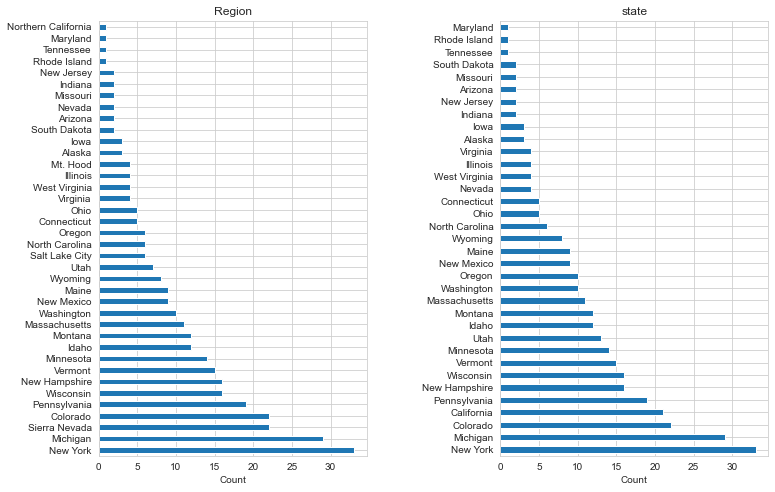

In [819]:
#Code task 13#
#Create two subplots on 1 row and 2 columns with a figsize of (12, 8)
fig, ax = plt.subplots(1, 2, figsize=(12,8))

# REGION
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
ski_data.Region.value_counts().plot(kind='barh', ax=ax[0])
#Give the plot a helpful title of 'Region'
ax[0].set_title('Region')
#Label the xaxis 'Count'
ax[0].set_xlabel('Count')

# STATE
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
ski_data.state.value_counts().plot(kind='barh', ax=ax[1])
#Give the plot a helpful title of 'state'
ax[1].set_title('state')
#Label the xaxis 'Count'
ax[1].set_xlabel('Count')


#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace=0.5);
#You're encouraged to explore a few different figure sizes, orientations, and spacing here
# as the importance of easy-to-read and informative figures is frequently understated
# and you will find the ability to tweak figures invaluable later on

In [820]:
# scratch
ski_data.Region.value_counts()

New York               33
Michigan               29
Sierra Nevada          22
Colorado               22
Pennsylvania           19
Wisconsin              16
New Hampshire          16
Vermont                15
Minnesota              14
Idaho                  12
Montana                12
Massachusetts          11
Washington             10
New Mexico              9
Maine                   9
Wyoming                 8
Utah                    7
Salt Lake City          6
North Carolina          6
Oregon                  6
Connecticut             5
Ohio                    5
Virginia                4
West Virginia           4
Illinois                4
Mt. Hood                4
Alaska                  3
Iowa                    3
South Dakota            2
Arizona                 2
Nevada                  2
Missouri                2
Indiana                 2
New Jersey              2
Rhode Island            1
Tennessee               1
Maryland                1
Northern California     1
Name: Region

How's your geography? Looking at the distribution of States, you see New York accounting for the majority of resorts. Our target resort is in Montana, which comes in at 13th place. You should think carefully about how, or whether, you use this information. Does New York command a premium because of its proximity to population? Even if a resort's State were a useful predictor of ticket price, your main interest lies in Montana. Would you want a model that is skewed for accuracy by New York? Should you just filter for Montana and create a Montana-specific model? This would slash your available data volume. Your problem task includes the contextual insight that the data are for resorts all belonging to the same market share. This suggests one might expect prices to be similar amongst them. You can look into this. A boxplot grouped by State is an ideal way to quickly compare prices. Another side note worth bringing up here is that, in reality, the best approach here definitely would include consulting with the client or other domain expert. They might know of good reasons for treating states equivalently or differently. The data scientist is rarely the final arbiter of such a decision. But here, you'll see if we can find any supporting evidence for treating states the same or differently.

#### 2.6.3.5 Distribution Of Ticket Price By State<a id='2.6.3.5_Distribution_Of_Ticket_Price_By_State'></a>

Our primary focus is our Big Mountain resort, in Montana. Does the state give you any clues to help decide what your primary target response feature should be (weekend or weekday ticket prices)?

##### 2.6.3.5.1 Average weekend and weekday price by state<a id='2.6.3.5.1_Average_weekend_and_weekday_price_by_state'></a>

In [821]:
#Code task 14#
# Calculate average weekday and weekend price by state and sort by the average of the two
# Hint: use the pattern dataframe.groupby(<grouping variable>)[<list of columns>].mean()
state_price_means = ski_data.groupby('state')[['AdultWeekday', 'AdultWeekend']].mean()
state_price_means.sort_values(['AdultWeekend', 'AdultWeekday'], ascending=False)

,AdultWeekday,AdultWeekend
state,,
Utah,89.08333,93.00000
Colorado,90.71429,90.71429
Vermont,83.50000,87.90000
Arizona,81.50000,83.50000
California,78.21429,81.41667
Nevada,78.50000,81.00000
New Jersey,79.99000,79.99000
West Virginia,62.50000,79.75000
Maryland,59.00000,79.00000


In [822]:
n = state_price_means.reindex(
        index=state_price_means.mean(axis=1)
        .sort_values(ascending=False)
        .index)
n

,AdultWeekday,AdultWeekend
state,,
Utah,89.08333,93.00000
Colorado,90.71429,90.71429
Vermont,83.50000,87.90000
Arizona,81.50000,83.50000
New Jersey,79.99000,79.99000
California,78.21429,81.41667
Nevada,78.50000,81.00000
West Virginia,62.50000,79.75000
New Hampshire,65.57143,76.50000


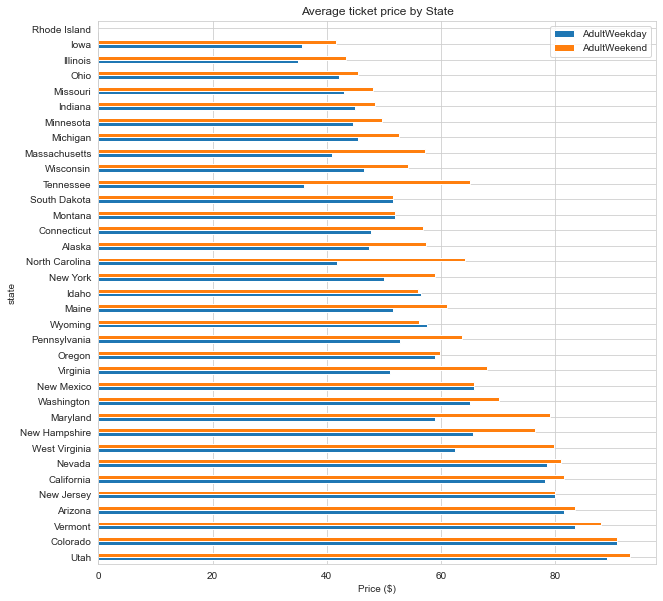

In [823]:
# The next bit simply reorders the index by increasing average of weekday and weekend prices
# Compare the index order you get from
# state_price_means.index
# with
# state_price_means.mean(axis=1).sort_values(ascending=False).index
# See how this expression simply sits within the reindex()
(state_price_means
    .reindex(
        index=state_price_means.mean(axis=1)
        .sort_values(ascending=False)
        .index)
    .plot(kind='barh', figsize=(10, 10), title='Average ticket price by State'))

plt.xlabel('Price ($)')
plt.show()

In [824]:
The figure above represents a dataframe with two columns, one for the average prices of each kind of ticket. This tells you how the average ticket price varies from state to state. But can you get more insight into the difference in the distributions between states?

Object `states` not found.


##### 2.6.3.5.2 Distribution of weekday and weekend price by state<a id='2.6.3.5.2_Distribution_of_weekday_and_weekend_price_by_state'></a>

Next, you can transform the data into a single column for price with a new categorical column that represents the ticket type.

In [825]:
#Code task 15#
#Use the pd.melt function, pass in the ski_data columns 'state', 'AdultWeekday', and 'Adultweekend' only,
#specify 'state' for `id_vars`
#gather the ticket prices from the 'Adultweekday' and 'AdultWeekend' columns using the `value_vars` argument,
#call the resultant price column 'Price' via the `value_name` argument,
#name the weekday/weekend indicator column 'Ticket' via the `var_name` argument
ticket_prices = pd.melt(ski_data[['state', 'AdultWeekday',  'AdultWeekend' ]],
                        id_vars='state',
                        var_name='Ticket',
                        value_vars=['AdultWeekday', 'AdultWeekend'],
                        value_name='Price')

In [826]:
ski_data[['state', 'AdultWeekday',  'AdultWeekend' ]].head()

,state,AdultWeekday,AdultWeekend
0,Alaska,65.00000,85.00000
1,Alaska,47.00000,53.00000
2,Alaska,30.00000,34.00000
3,Arizona,89.00000,89.00000
4,Arizona,74.00000,78.00000


In [827]:
ticket_prices.sort_values(by='state')

,state,Ticket,Price
0,Alaska,AdultWeekday,65.00000
1,Alaska,AdultWeekday,47.00000
2,Alaska,AdultWeekday,30.00000
330,Alaska,AdultWeekend,85.00000
331,Alaska,AdultWeekend,53.00000
...,...,...,...
324,Wyoming,AdultWeekday,NaN
323,Wyoming,AdultWeekday,48.00000
322,Wyoming,AdultWeekday,90.00000
658,Wyoming,AdultWeekend,49.00000


This is now in a format we can pass to [seaborn](https://seaborn.pydata.org/)'s [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) function to create boxplots of the ticket price distributions for each ticket type for each state.

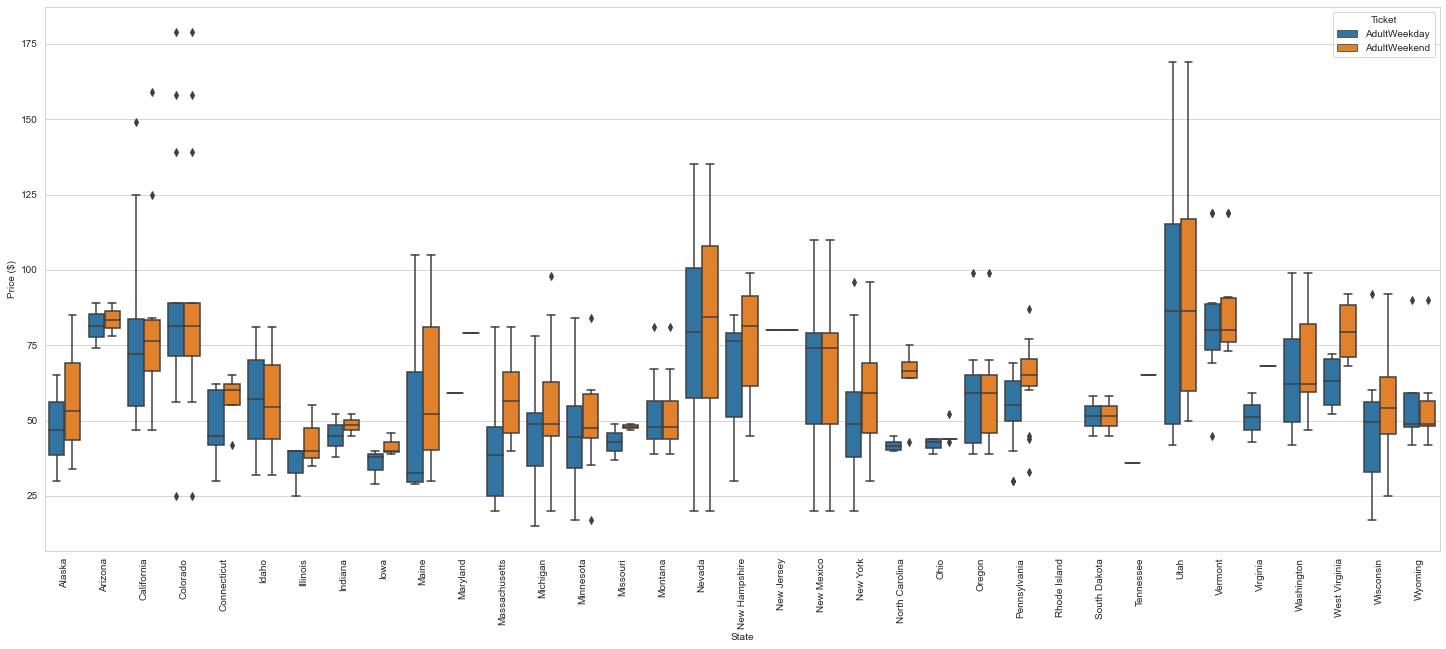

In [828]:
#Code task 16#
#Create a seaborn boxplot of the ticket price dataframe we created above,
#with 'state' on the x-axis, 'Price' as the y-value, and a hue that indicates 'Ticket'
#This will use boxplot's x, y, hue, and data arguments.
plt.subplots(figsize=(25, 10))
sns.boxplot(x='state', y='Price', hue='Ticket', data=ticket_prices)
plt.xticks(rotation='vertical')
plt.ylabel('Price ($)')
plt.xlabel('State');

Aside from some relatively expensive ticket prices in California, Colorado, and Utah, most prices appear to lie in a broad band from around 25 to over 100 dollars. Some States show more variability than others. Montana and South Dakota, for example, both show fairly small variability as well as matching weekend and weekday ticket prices. Nevada and Utah, on the other hand, show the most range in prices. Some States, notably North Carolina and Virginia, have weekend prices far higher than weekday prices. You could be inspired from this exploration to consider a few potential groupings of resorts, those with low spread, those with lower averages, and those that charge a premium for weekend tickets. However, you're told that you are taking all resorts to be part of the same market share, you  could argue against further segment the resorts. Nevertheless, ways to consider using the State information in your modelling include:

* disregard State completely
* retain all State information
* retain State in the form of Montana vs not Montana, as our target resort is in Montana

You've also noted another effect above: some States show a marked difference between weekday and weekend ticket prices. It may make sense to allow a model to take into account not just State but also weekend vs weekday.

Thus we currently have two main questions you want to resolve:

* What do you do about the two types of ticket price?
* What do you do about the state information?

### 2.6.4 Numeric Features<a id='2.6.4_Numeric_Features'></a>

Having decided to reserve judgement on how exactly you utilize the State, turn your attention to cleaning the numeric features.

#### 2.6.4.1 Numeric data summary<a id='2.6.4.1_Numeric_data_summary'></a>

In [829]:
#Code task 17#
#Call ski_data's `describe` method for a statistical summary of the numerical columns
#Hint: there are fewer summary stat columns than features, so displaying the transpose
#will be useful again
ski_data.describe().T

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.00000,4591.81818,3735.53593,315.00000,1403.75000,3127.50000,7806.00000,13487.00000
vertical_drop,330.00000,1215.42727,947.86456,60.00000,461.25000,964.50000,1800.00000,4425.00000
base_elev,330.00000,3374.00000,3117.12162,70.00000,869.00000,1561.50000,6325.25000,10800.00000
trams,330.00000,0.17273,0.55995,0.00000,0.00000,0.00000,0.00000,4.00000
fastEight,164.00000,0.00610,0.07809,0.00000,0.00000,0.00000,0.00000,1.00000
fastSixes,330.00000,0.18485,0.65169,0.00000,0.00000,0.00000,0.00000,6.00000
fastQuads,330.00000,1.01818,2.19829,0.00000,0.00000,0.00000,1.00000,15.00000
quad,330.00000,0.93333,1.31224,0.00000,0.00000,0.00000,1.00000,8.00000
triple,330.00000,1.50000,1.61913,0.00000,0.00000,1.00000,2.00000,8.00000
double,330.00000,1.83333,1.81503,0.00000,1.00000,1.00000,3.00000,14.00000


Recall you're missing the ticket prices for some 16% of resorts. This is a fundamental problem that means you simply lack the required data for those resorts and will have to drop those records. But you may have a weekend price and not a weekday price, or vice versa. You want to keep any price you have.

In [830]:
missing_price = ski_data[['AdultWeekday', 'AdultWeekend']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100


0   82.42424
2   14.24242
1    3.33333
dtype: float64

Just over 82% of resorts have no missing ticket price, 3% are missing one value, and 14% are missing both. You will definitely want to drop the records for which you have no price information, however you will not do so just yet. There may still be useful information about the distributions of other features in that 14% of the data.

#### 2.6.4.2 Distributions Of Feature Values<a id='2.6.4.2_Distributions_Of_Feature_Values'></a>

Note that, although we are still in the 'data wrangling and cleaning' phase rather than exploratory data analysis, looking at distributions of features is immensely useful in getting a feel for whether the values look sensible and whether there are any obvious outliers to investigate. Some exploratory data analysis belongs here, and data wrangling will inevitably occur later on. It's more a matter of emphasis. Here, we're interesting in focusing on whether distributions look plausible or wrong. Later on, we're more interested in relationships and patterns.

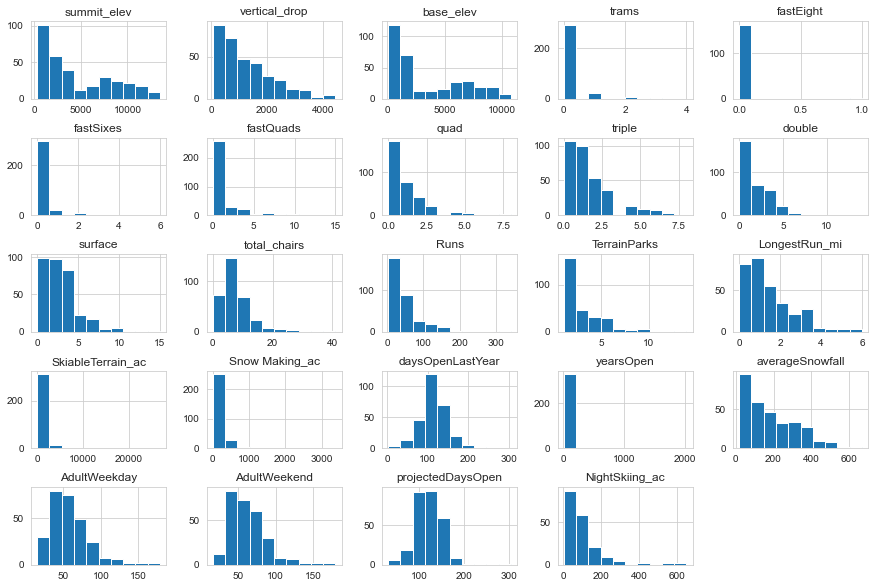

In [831]:
#Code task 18#
#Call ski_data's `hist` method to plot histograms of each of the numeric features
#Try passing it an argument figsize=(15,10)
#Try calling plt.subplots_adjust() with an argument hspace=0.5 to adjust the spacing
#It's important you create legible and easy-to-read plots
ski_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);
#Hint: notice how the terminating ';' "swallows" some messy output and leads to a tidier notebook

What features do we have possible cause for concern about and why?

* SkiableTerrain_ac because values are clustered down the low end,
* Snow Making_ac for the same reason,
* fastEight because all but one value is 0 so it has very little variance, and half the values are missing,
* fastSixes raises an amber flag; it has more variability, but still mostly 0,
* trams also may get an amber flag for the same reason,
* yearsOpen because most values are low but it has a maximum of 2019, which strongly suggests someone recorded calendar year rather than number of years.

##### 2.6.4.2.1 SkiableTerrain_ac<a id='2.6.4.2.1_SkiableTerrain_ac'></a>

In [832]:
#Code task 19#
#Filter the 'SkiableTerrain_ac' column to print the values greater than 10000
# ski_data.___[ski_data.___ > ___]
ski_data.SkiableTerrain_ac[ski_data.SkiableTerrain_ac > 10000]

39   26819.00000
Name: SkiableTerrain_ac, dtype: float64

**Q: 2** One resort has an incredibly large skiable terrain area! Which is it?

In [833]:
#Code task 20#
#Now you know there's only one, print the whole row to investigate all values, including seeing the resort name
#Hint: don't forget the transpose will be helpful here
ski_data[ski_data.SkiableTerrain_ac > 10000].T

,39
Name,Silverton Mountain
Region,Colorado
state,Colorado
summit_elev,13487
vertical_drop,3087
base_elev,10400
trams,0
fastEight,0.00000
fastSixes,0
fastQuads,0


**A: 2** Your answer here: <span style="color:#cc0000">Silverton Mountain</span>

But what can you do when you have one record that seems highly suspicious?

You can see if your data are correct. Search for "silverton mountain skiable area". If you do this, you get some [useful information](https://www.google.com/search?q=silverton+mountain+skiable+area).

![Silverton Mountain information](../images/silverton_mountain_info.png)

You can spot check data. You see your top and base elevation values agree, but the skiable area is very different. Your suspect value is 26819, but the value you've just looked up is 1819. The last three digits agree. This sort of error could have occured in transmission or some editing or transcription stage. You could plausibly replace the suspect value with the one you've just obtained. Another cautionary note to make here is that although you're doing this in order to progress with your analysis, this is most definitely an issue that should have been raised and fed back to the client or data originator as a query. You should view this "data correction" step as a means to continue (documenting it carefully as you do in this notebook) rather than an ultimate decision as to what is correct.

In [834]:
#Code task 21#
#Use the .loc accessor to print the 'SkiableTerrain_ac' value only for this resort
ski_data.loc[39, 'SkiableTerrain_ac']

26819.0

In [835]:
#Code task 22#
#Use the .loc accessor again to modify this value with the correct value of 1819
ski_data.loc[39, 'SkiableTerrain_ac'] = 1819

In [836]:
#Code task 23#
#Use the .loc accessor a final time to verify that the value has been modified
ski_data.loc[39, 'SkiableTerrain_ac']

1819.0

**NB whilst you may become suspicious about your data quality, and you know you have missing values, you will not here dive down the rabbit hole of checking all values or web scraping to replace missing values.**

What does the distribution of skiable area look like now?

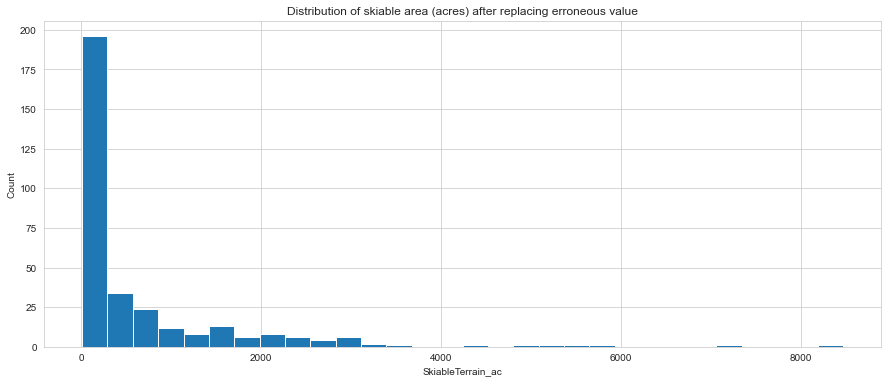

In [837]:
ski_data.SkiableTerrain_ac.hist(figsize=(15, 6), bins=30)
plt.xlabel('SkiableTerrain_ac')
plt.ylabel('Count')
plt.title('Distribution of skiable area (acres) after replacing erroneous value');

You now see a rather long tailed distribution. You may wonder about the now most extreme value that is above 8000, but similarly you may also wonder about the value around 7000. If you wanted to spend more time manually checking values you could, but leave this for now. The above distribution is plausible.

##### 2.6.4.2.2 Snow Making_ac<a id='2.6.4.2.2_Snow_Making_ac'></a>

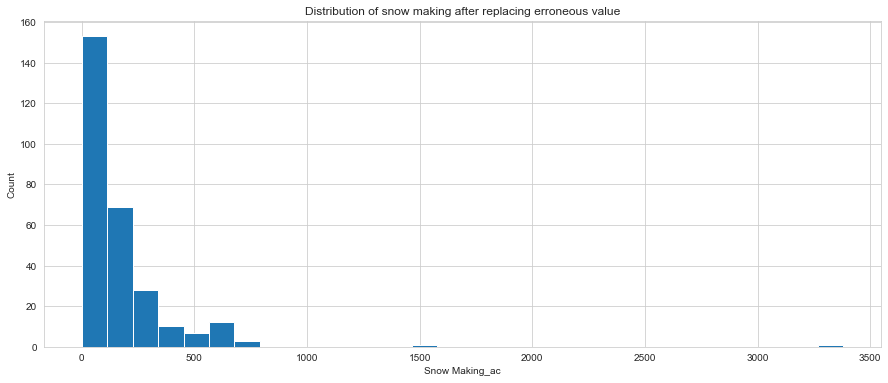

In [838]:
ski_data['Snow Making_ac'].hist(figsize=(15, 6), bins=30)
plt.xlabel('Snow Making_ac')
plt.ylabel('Count')
plt.title('Distribution of snow making after replacing erroneous value');

In [839]:
ski_data['Snow Making_ac'][ski_data['Snow Making_ac'] > 1000]

11   3379.00000
18   1500.00000
Name: Snow Making_ac, dtype: float64

In [840]:
ski_data[ski_data['Snow Making_ac'] > 3000].T

,11
Name,Heavenly Mountain Resort
Region,Sierra Nevada
state,California
summit_elev,10067
vertical_drop,3500
base_elev,7170
trams,2
fastEight,0.00000
fastSixes,2
fastQuads,7


You can adopt a similar approach as for the suspect skiable area value and do some spot checking. To save time, here is a link to the website for [Heavenly Mountain Resort](https://www.skiheavenly.com/the-mountain/about-the-mountain/mountain-info.aspx). From this you can glean that you have values for skiable terrain that agree. Furthermore, you can read that snowmaking covers 60% of the trails.

What, then, is your rough guess for the area covered by snowmaking?

In [841]:
.6 * 4800

2880.0

This is less than the value of 3379 in your data so you may have a judgement call to make. However, notice something else. You have no ticket pricing information at all for this resort. Any further effort spent worrying about values for this resort will be wasted. You'll simply be dropping the entire row!

##### 2.6.4.2.3 fastEight<a id='2.6.4.2.3_fastEight'></a>

Look at the different fastEight values more closely:

In [842]:
ski_data.fastEight.value_counts()

0.00000    163
1.00000      1
Name: fastEight, dtype: int64

Drop the fastEight column in its entirety; half the values are missing and all but the others are the value zero. There is essentially no information in this column.

In [843]:
#Code task 24#
#Drop the 'fastEight' column from ski_data. Use inplace=True
ski_data.drop(columns=['fastEight'], inplace=True)

What about yearsOpen? How many resorts have purportedly been open for more than 100 years?

In [844]:
#Code task 25#
#Filter the 'yearsOpen' column for values greater than 100
ski_data.loc[ski_data.yearsOpen > 100][['Name', 'yearsOpen']]

,Name,yearsOpen
34,Howelsen Hill,104.00000
115,Pine Knob Ski Resort,2019.00000


Okay, one seems to have been open for 104 years. But beyond that, one is down as having been open for 2019 years. This is wrong! What shall you do about this?

What does the distribution of yearsOpen look like if you exclude just the obviously wrong one?

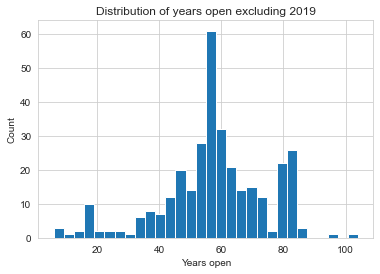

In [845]:
#Code task 26#
#Call the hist method on 'yearsOpen' after filtering for values under 1000
#Pass the argument bins=30 to hist(), but feel free to explore other values
ski_data.yearsOpen[ski_data.yearsOpen < 1000].hist(bins=30)
plt.xlabel('Years open')
plt.ylabel('Count')
plt.title('Distribution of years open excluding 2019');

The above distribution of years seems entirely plausible, including the 104 year value. You can certainly state that no resort will have been open for 2019 years! It likely means the resort opened in 2019. It could also mean the resort is due to open in 2019. You don't know when these data were gathered!

Let's review the summary statistics for the years under 1000.

In [846]:
ski_data.yearsOpen[ski_data.yearsOpen < 1000].describe()

count   328.00000
mean     57.69512
std      16.84118
min       6.00000
25%      50.00000
50%      58.00000
75%      68.25000
max     104.00000
Name: yearsOpen, dtype: float64

The smallest number of years open otherwise is 6. You can't be sure whether this resort in question has been open zero years or one year and even whether the numbers are projections or actual. In any case, you would be adding a new youngest resort so it feels best to simply drop this row.

In [847]:
ski_data = ski_data[ski_data.yearsOpen < 1000]

##### 2.6.4.2.4 fastSixes and Trams<a id='2.6.4.2.4_fastSixes_and_Trams'></a>

The other features you had mild concern over, you will not investigate further. Perhaps take some care when using these features.

## 2.7 Derive State-wide Summary Statistics For Our Market Segment<a id='2.7_Derive_State-wide_Summary_Statistics_For_Our_Market_Segment'></a>

You have, by this point removed one row, but it was for a resort that may not have opened yet, or perhaps in its first season. Using your business knowledge, you know that state-wide supply and demand of certain skiing resources may well factor into pricing strategies. Does a resort dominate the available night skiing in a state? Or does it account for a large proportion of the total skiable terrain or days open?

If you want to add any features to your data that captures the state-wide market size, you should do this now, before dropping any more rows. In the next section, you'll drop rows with missing price information. Although you don't know what those resorts charge for their tickets, you do know the resorts exists and have been open for at least six years. Thus, you'll now calculate some state-wide summary statistics for later use.

Many features in your data pertain to chairlifts, that is for getting people around each resort. These aren't relevant, nor are the features relating to altitudes. Features that you may be interested in are:

* TerrainParks
* SkiableTerrain_ac
* daysOpenLastYear
* NightSkiing_ac

When you think about it, these are features it makes sense to sum: the total number of terrain parks, the total skiable area, the total number of days open, and the total area available for night skiing. You might consider the total number of ski runs, but understand that the skiable area is more informative than just a number of runs.

A fairly new groupby behaviour is [named aggregation](https://pandas-docs.github.io/pandas-docs-travis/whatsnew/v0.25.0.html). This allows us to clearly perform the aggregations you want whilst also creating informative output column names.

In [848]:
#scratch
ski_data.columns

Index(['Name', 'Region', 'state', 'summit_elev', 'vertical_drop', 'base_elev',
       'trams', 'fastSixes', 'fastQuads', 'quad', 'triple', 'double',
       'surface', 'total_chairs', 'Runs', 'TerrainParks', 'LongestRun_mi',
       'SkiableTerrain_ac', 'Snow Making_ac', 'daysOpenLastYear', 'yearsOpen',
       'averageSnowfall', 'AdultWeekday', 'AdultWeekend', 'projectedDaysOpen',
       'NightSkiing_ac'],
      dtype='object')

In [849]:
#Code task 27#
#Add named aggregations for the sum of 'daysOpenLastYear', 'TerrainParks', and 'NightSkiing_ac'
#call them 'state_total_days_open', 'state_total_terrain_parks', and 'state_total_nightskiing_ac',
#respectively
#Finally, add a call to the reset_index() method (we recommend you experiment with and without this to see
#what it does)
state_summary = ski_data.groupby('state').agg(
    resorts_per_state=pd.NamedAgg(column='Name', aggfunc='size'), #could pick any column here
    state_total_skiable_area_ac=pd.NamedAgg(column='SkiableTerrain_ac', aggfunc='sum'),
    state_total_days_open      =pd.NamedAgg(column='daysOpenLastYear', aggfunc='sum'),
    state_total_terrain_parks  =pd.NamedAgg(column='TerrainParks',     aggfunc='sum'),
    state_total_nightskiing_ac =pd.NamedAgg(column='NightSkiing_ac', aggfunc='sum')
).reset_index()
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac
0,Alaska,3,2280.00000,345.00000,4.00000,580.00000
1,Arizona,2,1577.00000,237.00000,6.00000,80.00000
2,California,21,25948.00000,2738.00000,81.00000,587.00000
3,Colorado,22,43682.00000,3258.00000,74.00000,428.00000
4,Connecticut,5,358.00000,353.00000,10.00000,256.00000


## 2.8 Drop Rows With No Price Data<a id='2.8_Drop_Rows_With_No_Price_Data'></a>

You know there are two columns that refer to price: 'AdultWeekend' and 'AdultWeekday'. You can calculate the number of price values missing per row. This will obviously have to be either 0, 1, or 2, where 0 denotes no price values are missing and 2 denotes that both are missing.

In [850]:
missing_price = ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

0   82.31707
2   14.32927
1    3.35366
dtype: float64

In [851]:
#scratch
missing_price.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [852]:
# scratch
test_ski = ski_data[ski_data.AdultWeekday.isna() & ski_data.AdultWeekend.isna()]
print(test_ski.shape)
test_missing = test_ski[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)
test_ski = test_ski[test_missing != 2]
print(test_ski.shape)

(47, 26)
(0, 26)


About 14% of the rows have no price data. As the price is your target, these rows are of no use. Time to lose them.

In [853]:
#Code task 28#
#Use `missing_price` to remove rows from ski_data where both price values are missing
print("Should remove ", ski_data[missing_price == 2].Name.count())
print("before removing",ski_data.shape)
ski_data = ski_data[missing_price != 2]
print("after removing",ski_data.shape)
ski_data[ski_data.AdultWeekday.isna() & ski_data.AdultWeekend.isna()].sum().sum()

Should remove  47
before removing (328, 26)
after removing (281, 26)


0.0

## 2.9 Review distributions<a id='2.9_Review_distributions'></a>

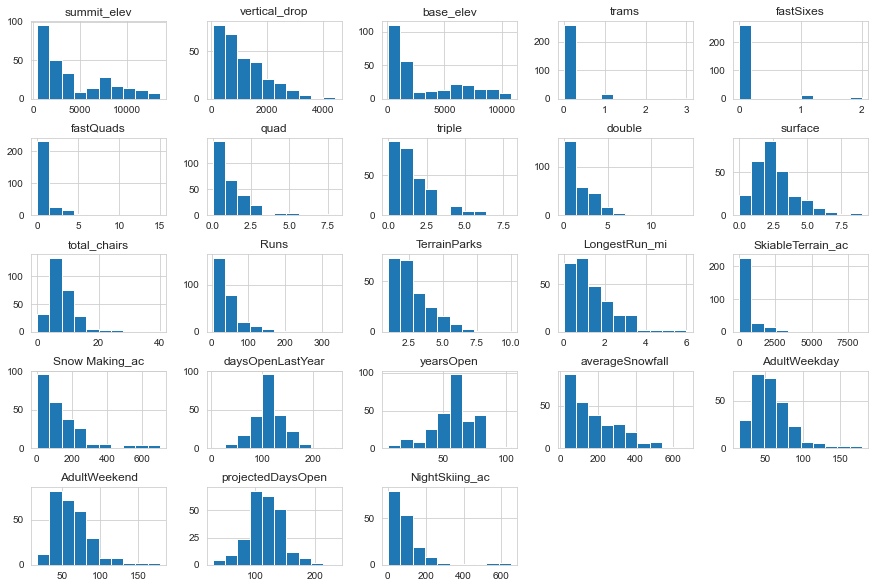

In [854]:
ski_data.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

These distributions are much better. There are clearly some skewed distributions, so keep an eye on `fastQuads`, `fastSixes`, and perhaps `trams`. These lack much variance away from 0 and may have a small number of relatively extreme values.  Models failing to rate a feature as important when domain knowledge tells you it should be is an issue to look out for, as is a model being overly influenced by some extreme values. If you build a good machine learning pipeline, hopefully it will be robust to such issues, but you may also wish to consider nonlinear transformations of features.

## 2.10 Population data<a id='2.10_Population_data'></a>

Population and area data for the US states can be obtained from [wikipedia](https://simple.wikipedia.org/wiki/List_of_U.S._states). Listen, you should have a healthy concern about using data you "found on the Internet". Make sure it comes from a reputable source. This table of data is useful because it allows you to easily pull and incorporate an external data set. It also allows you to proceed with an analysis that includes state sizes and populations for your 'first cut' model. Be explicit about your source (we documented it here in this workflow) and ensure it is open to inspection. All steps are subject to review, and it may be that a client has a specific source of data they trust that you should use to rerun the analysis.

In [855]:
#Code task 29#
#Use pandas' `read_html` method to read the table from the URL below
states_url = 'https://simple.wikipedia.org/w/index.php?title=List_of_U.S._states&oldid=7168473'
usa_states = pd.read_html(states_url)

In [856]:
type(usa_states)

list

In [857]:
len(usa_states)

1

In [858]:
usa_states = usa_states[0]
usa_states.head()

Name &postal abbs. [1]                                Cities               \
  Name &postal abbs. [1] Name &postal abbs. [1].1      Capital   Largest[5]   
0                Alabama                       AL   Montgomery   Birmingham   
1                 Alaska                       AK       Juneau    Anchorage   
2                Arizona                       AZ      Phoenix      Phoenix   
3               Arkansas                       AR  Little Rock  Little Rock   
4             California                       CA   Sacramento  Los Angeles   

  Established[A] Population[B][3] Total area[4]          Land area[4]  \
  Established[A] Population[B][3]           mi2      km2          mi2   
0   Dec 14, 1819          4903185         52420   135767        50645   
1    Jan 3, 1959           731545        665384  1723337       570641   
2   Feb 14, 1912          7278717        113990   295234       113594   
3   Jun 15, 1836          3017804         53179   137732        52035   
4    Sep 9, 1850         39512223        163695   423967       155779   

           Water area[4]         Numberof Reps.  
       km2           mi2     km2 Numberof Reps.  
0   131171          1775    4597              7  
1  1477953         94743  245384              1  
2   294207           396    1026              9  
3   134771          1143    2961              4  
4   403466          7916   20501             53

Note, in even the last year, the capability of `pd.read_html()` has improved. The merged cells you see in the web table are now handled much more conveniently, with 'Phoenix' now being duplicated so the subsequent columns remain aligned. But check this anyway. If you extract the established date column, you should just get dates. Recall previously you used the `.loc` accessor, because you were using labels. Now you want to refer to a column by its index position and so use `.iloc`. For a discussion on the difference use cases of `.loc` and `.iloc` refer to the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html).

In [859]:
#Code task 30#
#Use the iloc accessor to get the pandas Series for column number 4 from `usa_states`
#It should be a column of dates
established = usa_states.iloc[:, 4]

In [860]:
established

0     Dec 14, 1819
1      Jan 3, 1959
2     Feb 14, 1912
3     Jun 15, 1836
4      Sep 9, 1850
5      Aug 1, 1876
6      Jan 9, 1788
7      Dec 7, 1787
8      Mar 3, 1845
9      Jan 2, 1788
10    Aug 21, 1959
11     Jul 3, 1890
12     Dec 3, 1818
13    Dec 11, 1816
14    Dec 28, 1846
15    Jan 29, 1861
16     Jun 1, 1792
17    Apr 30, 1812
18    Mar 15, 1820
19    Apr 28, 1788
20     Feb 6, 1788
21    Jan 26, 1837
22    May 11, 1858
23    Dec 10, 1817
24    Aug 10, 1821
25     Nov 8, 1889
26     Mar 1, 1867
27    Oct 31, 1864
28    Jun 21, 1788
29    Dec 18, 1787
30     Jan 6, 1912
31    Jul 26, 1788
32    Nov 21, 1789
33     Nov 2, 1889
34     Mar 1, 1803
35    Nov 16, 1907
36    Feb 14, 1859
37    Dec 12, 1787
38    May 29, 1790
39    May 23, 1788
40     Nov 2, 1889
41     Jun 1, 1796
42    Dec 29, 1845
43     Jan 4, 1896
44     Mar 4, 1791
45    Jun 25, 1788
46    Nov 11, 1889
47    Jun 20, 1863
48    May 29, 1848
49    Jul 10, 1890
Name: (Established[A], Established[A]), dtype: obj

Extract the state name, population, and total area (square miles) columns.

In [861]:
#Code task 31#
#Now use the iloc accessor again to extract columns 0, 5, and 6 and the dataframe's `copy()` method
#Set the names of these extracted columns to 'state', 'state_population', and 'state_area_sq_miles',
#respectively.
usa_states_sub = usa_states.iloc[:, [0,5,6]].copy()
usa_states_sub.columns = ['state', 'state_population',  'state_area_sq_miles']
usa_states_sub.head()

,state,state_population,state_area_sq_miles
0,Alabama,4903185,52420
1,Alaska,731545,665384
2,Arizona,7278717,113990
3,Arkansas,3017804,53179
4,California,39512223,163695


Do you have all the ski data states accounted for?

In [862]:
#Code task 32#
#Find the states in `state_summary` that are not in `usa_states_sub`
#Hint: set(list1) - set(list2) is an easy way to get items in list1 that are not in list2
missing_states = set(state_summary.state) - set(usa_states_sub.state)
missing_states

{'Massachusetts', 'Pennsylvania', 'Rhode Island', 'Virginia'}

In [863]:
set(state_summary.state).difference(set(usa_states_sub.state))

{'Massachusetts', 'Pennsylvania', 'Rhode Island', 'Virginia'}

If you look at the table on the web, you can perhaps start to guess what the problem is. You can confirm your suspicion by pulling out state names that _contain_ 'Massachusetts', 'Pennsylvania', or 'Virginia' from usa_states_sub:

In [864]:
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]

20    Massachusetts[C]
37     Pennsylvania[C]
38     Rhode Island[D]
45         Virginia[C]
47       West Virginia
Name: state, dtype: object

Delete square brackets and their contents and try again:

In [865]:
#Code task 33#
#Use pandas' Series' `replace()` method to replace anything within square brackets (including the brackets)
#with the empty string. Do this inplace, so you need to specify the arguments:
#to_replace='\[.*\]' #literal square bracket followed by anything or nothing followed by literal closing bracket
#value='' #empty string as replacement
#regex=True #we used a regex in our `to_replace` argument
#inplace=True #Do this "in place"
usa_states_sub.state.replace(to_replace='\[.*\]', value='', regex=True, inplace=True)
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]

20    Massachusetts
37     Pennsylvania
38     Rhode Island
45         Virginia
47    West Virginia
Name: state, dtype: object

In [866]:
#Code task 34#
#And now verify none of our states are missing by checking that there are no states in
#state_summary that are not in usa_states_sub (as earlier using `set()`)
missing_states = set(state_summary.state) - set(usa_states_sub.state)
missing_states

set()

Better! You have an empty set for missing states now. You can confidently add the population and state area columns to the ski resort data.

In [867]:
#Code task 35#
#Use 'state_summary's `merge()` method to combine our new data in 'usa_states_sub'
#specify the arguments how='left' and on='state'
state_summary = state_summary.merge(usa_states_sub, how='left', on='state')
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,state_population,state_area_sq_miles
0,Alaska,3,2280.00000,345.00000,4.00000,580.00000,731545,665384
1,Arizona,2,1577.00000,237.00000,6.00000,80.00000,7278717,113990
2,California,21,25948.00000,2738.00000,81.00000,587.00000,39512223,163695
3,Colorado,22,43682.00000,3258.00000,74.00000,428.00000,5758736,104094
4,Connecticut,5,358.00000,353.00000,10.00000,256.00000,3565278,5543


Having created this data frame of summary statistics for various states, it would seem obvious to join this with the ski resort data to augment it with this additional data. You will do this, but not now. In the next notebook you will be exploring the data, including the relationships between the states. For that you want a separate row for each state, as you have here, and joining the data this soon means you'd need to separate and eliminate redundances in the state data when you wanted it.

## 2.11 Target Feature<a id='2.11_Target_Feature'></a>

Finally, what will your target be when modelling ticket price? What relationship is there between weekday and weekend prices?

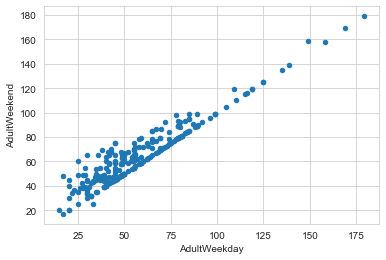

In [868]:
#Code task 36#
#Use ski_data's `plot()` method to create a scatterplot (kind='scatter') with 'AdultWeekday' on the x-axis and
#'AdultWeekend' on the y-axis
ski_data.plot.scatter(x='AdultWeekday', y='AdultWeekend');

A couple of observations can be made. Firstly, there is a clear line where weekend and weekday prices are equal. Weekend prices being higher than weekday prices seem restricted to sub $100 resorts. Recall from the boxplot earlier that the distribution for weekday and weekend prices in Montana seemed equal. Is this confirmed in the actual data for each resort? Big Mountain resort is in Montana, so the relationship between these quantities in this state are particularly relevant.

In [869]:
#Code task 37#
#Use the loc accessor on ski_data to print the 'AdultWeekend' and 'AdultWeekday' columns for Montana only
ski_data.loc[(ski_data.state == 'Montana'), ['AdultWeekend', 'AdultWeekday']]

,AdultWeekend,AdultWeekday
141,42.00000,42.00000
142,63.00000,63.00000
143,49.00000,49.00000
144,48.00000,48.00000
145,46.00000,46.00000
146,39.00000,39.00000
147,50.00000,50.00000
148,67.00000,67.00000
149,47.00000,47.00000
150,39.00000,39.00000


Is there any reason to prefer weekend or weekday prices? Which is missing the least?

In [870]:
ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum()

AdultWeekend    4
AdultWeekday    7
dtype: int64

Weekend prices have the least missing values of the two, so drop the weekday prices and then keep just the rows that have weekend price.

In [871]:
ski_data.drop(columns='AdultWeekday', inplace=True)
ski_data.dropna(subset=['AdultWeekend'], inplace=True)

In [872]:
ski_data.shape

(277, 25)

In [873]:
final_columns_set = set(ski_data.columns)

In [874]:
deleted_columns = original_columns_set.difference(final_columns_set)
deleted_columns

{'AdultWeekday', 'fastEight'}

Perform a final quick check on the data.

### 2.11.1 Number Of Missing Values By Row - Resort<a id='2.11.1_Number_Of_Missing_Values_By_Row_-_Resort'></a>

Having dropped rows missing the desired target ticket price, what degree of missingness do you have for the remaining rows?

In [875]:
missing = pd.concat([ski_data.isnull().sum(axis=1), 100 * ski_data.isnull().mean(axis=1)], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False).head(10)

,count,%
329,5,20.00000
62,5,20.00000
141,5,20.00000
86,5,20.00000
74,5,20.00000
146,5,20.00000
184,4,16.00000
108,4,16.00000
198,4,16.00000
39,4,16.00000


These seem possibly curiously quantized...

In [876]:
missing['%'].unique()

array([ 0.,  4.,  8., 12., 16., 20.])

Yes, the percentage of missing values per row appear in multiples of 4.

In [877]:
missing['%'].value_counts()

0.00000     107
4.00000      94
8.00000      45
12.00000     15
16.00000     10
20.00000      6
Name: %, dtype: int64

This is almost as if values have been removed artificially... Nevertheless, what you don't know is how useful the missing features are in predicting ticket price. You shouldn't just drop rows that are missing several useless features.

In [878]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 329
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               277 non-null    object 
 1   Region             277 non-null    object 
 2   state              277 non-null    object 
 3   summit_elev        277 non-null    int64  
 4   vertical_drop      277 non-null    int64  
 5   base_elev          277 non-null    int64  
 6   trams              277 non-null    int64  
 7   fastSixes          277 non-null    int64  
 8   fastQuads          277 non-null    int64  
 9   quad               277 non-null    int64  
 10  triple             277 non-null    int64  
 11  double             277 non-null    int64  
 12  surface            277 non-null    int64  
 13  total_chairs       277 non-null    int64  
 14  Runs               274 non-null    float64
 15  TerrainParks       233 non-null    float64
 16  LongestRun_mi      272 non

There are still some missing values, and it's good to be aware of this, but leave them as is for now.

## 2.12 Save data<a id='2.12_Save_data'></a>

In [879]:
ski_data.shape

(277, 25)

Save this to your data directory, separately. Note that you were provided with the data in `raw_data` and you should saving derived data in a separate location. This guards against overwriting our original data.

In [880]:
# save the data to a new csv file
datapath = '../data'
save_file(ski_data, 'ski_data_cleaned.csv', datapath)

A file already exists with this name.

Writing file.  "../data/ski_data_cleaned.csv"


In [881]:
# save the state_summary separately.
datapath = '../data'
save_file(state_summary, 'state_summary.csv', datapath)

A file already exists with this name.

Writing file.  "../data/state_summary.csv"


## 2.13 Summary<a id='2.13_Summary'></a>

**Q: 3** Write a summary statement that highlights the key processes and findings from this notebook. This should include information such as the original number of rows in the data, whether our own resort was actually present etc. What columns, if any, have been removed? Any rows? Summarise the reasons why. Were any other issues found? What remedial actions did you take? State where you are in the project. Can you confirm what the target feature is for your desire to predict ticket price? How many rows were left in the data? Hint: this is a great opportunity to reread your notebook, check all cells have been executed in order and from a "blank slate" (restarting the kernel will do this), and that your workflow makes sense and follows a logical pattern. As you do this you can pull out salient information for inclusion in this summary. Thus, this section will provide an important overview of "what" and "why" without having to dive into the "how" or any unproductive or inconclusive steps along the way.

**A: 3** Your answer here

---

# Problem

A short restatement of the problem definition: Big Mountain ski resort in Montana wants to determine what options the company has for pricing.  That lets us know what kind of investments the company can make, and whether the company is getting the best returns on its existing investments.  There is also some talk of lowering operational costs, which could increase profits as well, but that's a different question.

</p>

---

# Data Wrangling
This part of the project is focused on assessing and cleaning the data that we have.


---

## We have the following data

**1. raw ski data** - of unknown providence containing facilities and pricing data for ski resports theought the US.
**2. state population** information scrapped from web
no other data will be used in this project

##### The original raw ski data contains 330 rows and 27 columns
##### The cleaned data has 277 rows and 25 columns
        - We dropped 53 rows - primariy due to null pricing and a resort with a bad 'years open' row
        - We dropped 2 columns {'AdultWeekday', and 'fastEight'}

**3. We derived a US state-level dataset from the raw ski data and added state population and area data**


</p>
</p>

---


# Approach

**Quick Review of the data**
 - The raw ski data has 330 rows and 27 columns

**Assess the completeness of the data**
	- Make sure our resort is represented in the data
	- Understand where the data is missing values
	- In terms of null values we can see that we have the following missing percentages:

        fastEight           50% missing data
        NightSkiing_ac      43% missing data
        AdultWeekday        16% missing data
        AdultWeekend        15% missing data
        daysOpenLastYear    15% missing data
        TerrainParks	15% missing data
        projectedDaysOpen   14% missing data
        Snow Making_ac      14% missing data
         averageSnowfall     4% missing data

**Assess the data types in the data**
        - There are three informational columns - Resort Name, US State, and Region - Region is a subset of US state
        - The rest are numeric columns

**Assess the information in each non-numeric column**

		- Are there and duplicates in the resort Names column?  (No)
		- Are all states represented? (Yes)
		- How do regions and states relate to one another?  (In some limited cases the state has a region like 'Sierra Nevadas')
		- Resorts are distributed unevenly across US states 0 New York has many resort
		    - New York has the highest number of resports - at 33
		    - Montana has 11 resorts
		    - We don't know whether the 11 Montana constitutes a good market subset for our evaluation, or whether the central states would be a good segment, or whether some other market segmentation would be 'better'


**Assess the information in each numeric column**
        - We looked at each important column to understand what information is distributed in each column
        - We are focusing primarily on Weekend **pricing**, because it tracks closely to Weekday prices and it's more complete (fewer missing fields)

**Cleaning**
    - We are focusing primarily on Weekend pricing, because it tracks closely to Weekday prices and it's more complete (fewer missing fields)
    - We dropped the entire Weekday pricing column
    - We dropped any rows having null Weekend pricing
    - The data for facilities, such as snow-making equipment, lifts, parks and trams will probably not be complete enough as is, but we have not dropped that data yet
    - We dropped the fastEight column - it is 50% empty
    - We dropped a row having a bad 'yearsOpen' column

**Augmenting the data**
   - We created a new datset summarizing our data at the US state level, and added population and total area for each state
